# Multiple linear regression - PHASE 1 model creation. 
## PROBLEM STATEMENT: 
### Profit prediction for startups based on the investment rate in different departments

### 1. load the dataset 

In [1]:
# import libraries 
import pandas as pd
# load dataset
dataset = pd.read_csv("50_Startups.csv")
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### handling categorical data

In [2]:
# find the categorial data is nomial or ordinal
""" 
state name -> nominal - one hot encoding method (for converting categorical into numerical)

this conversion can be done using pd.get_dummies(<dataset>) function  
"""

' \nstate name -> nominal - one hot encoding method (for converting categorical into numerical)\n\nthis conversion can be done using pd.get_dummies(<dataset>) function  \n'

In [3]:
dataset_afConversion = pd.get_dummies(dataset, drop_first=True, dtype = int)   #  dtype = int  --> returns values based on 0's an
dataset_afConversion

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [4]:
#  dtype = int  --> returns values based on 0's and 1's
dataset_afConversion = pd.get_dummies(dataset, drop_first=True, dtype = int)   
dataset_afConversion

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


### split input and output

In [5]:
dataset_afConversion.columns  # list column names 

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [6]:
independent = dataset_afConversion[[ 'R&D Spend', 'Administration', 'Marketing Spend',  'State_Florida', 'State_New York' ]]
independent

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [7]:
dependent = dataset_afConversion[[ 'Profit' ]]
dependent

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [8]:
# data visulization - 
# import matplotlib.pyplot as plt
# # Example: assuming dataset_afConversion already defined
# X = dataset_afConversion[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
# y = dataset_afConversion['Profit']
# # Plot each independent variable vs dependent
# plt.figure(figsize=(8, 5))
# for col in independent.columns:
#     plt.scatter(independent[col], dependent['Profit'], label=col, alpha=0.6)
# plt.title('Independent Variables vs Profit')
# plt.xlabel('Independent Variables (Values)')
# plt.ylabel('Profit')
# plt.legend()
# plt.grid(True)
# plt.show()

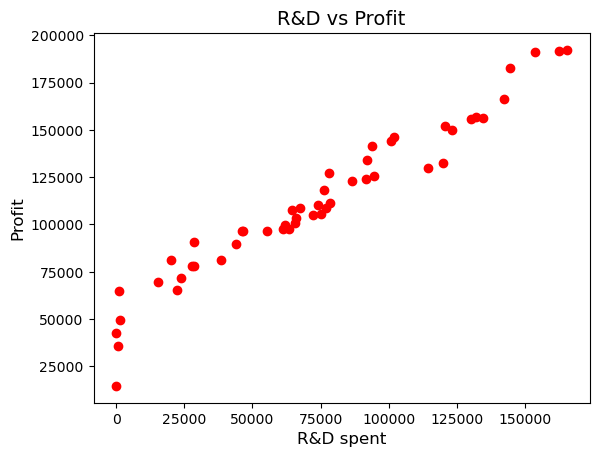

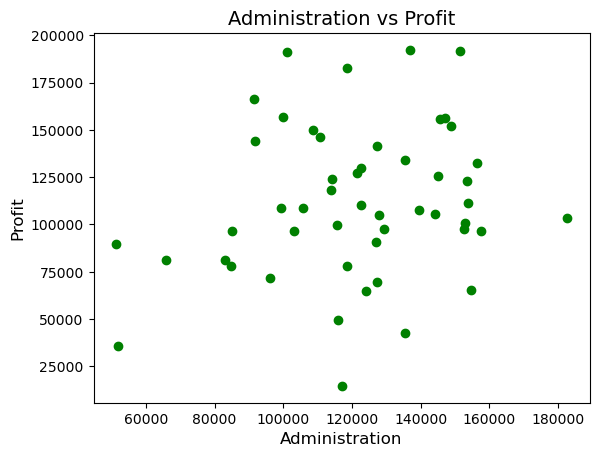

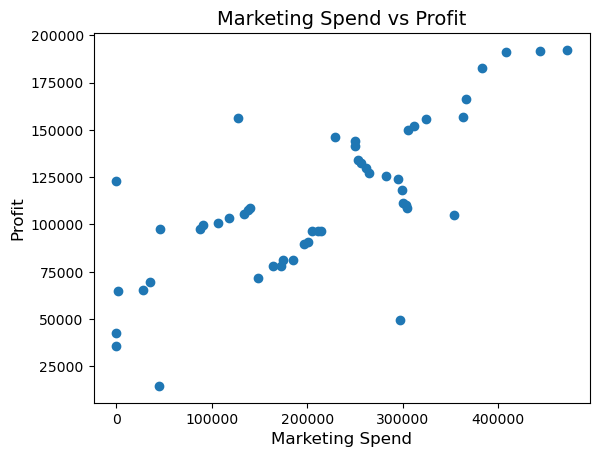

In [9]:
# plot 
import matplotlib.pyplot as plt

plt.scatter(independent['R&D Spend'], dependent, color='red')
plt.xlabel("R&D spent", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.title("R&D vs Profit", fontsize=14)
plt.show()

plt.scatter(independent['Administration'], dependent, color='green')
plt.xlabel("Administration", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.title("Administration vs Profit", fontsize=14)
plt.show()

plt.scatter(independent['Marketing Spend'], dependent)
plt.xlabel("Marketing Spend", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.title("Marketing Spend vs Profit", fontsize=14)
plt.show()



### split train and test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.20, random_state=0)

In [11]:
x_train

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
33,55493.95,103057.49,214634.81,1,0
35,46014.02,85047.44,205517.64,0,1
26,75328.87,144135.98,134050.07,1,0
34,46426.07,157693.92,210797.67,0,0
18,91749.16,114175.79,294919.57,1,0
7,130298.13,145530.06,323876.68,1,0
14,119943.24,156547.42,256512.92,1,0
45,1000.23,124153.04,1903.93,0,1
48,542.05,51743.15,0.00,0,1
29,65605.48,153032.06,107138.38,0,1


In [12]:
x_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0
27,72107.60,127864.55,353183.81,0,1
38,20229.59,65947.93,185265.10,0,1
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
4,142107.34,91391.77,366168.42,1,0


In [13]:
y_train

,Profit
33,96778.92
35,96479.51
26,105733.54
34,96712.80
18,124266.90
7,155752.60
14,132602.65
45,64926.08
48,35673.41
29,101004.64


In [14]:
y_test

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


### model creation 

In [15]:
from sklearn.linear_model import LinearRegression
profit_prediction_model = LinearRegression()
profit_prediction_model.fit(x_train,y_train)   # train set - i/p and o/p 

LinearRegression()

### view multiple weight and bais

In [16]:
mul_weight = profit_prediction_model.coef_
mul_weight    # multiple slopes of multiple input data's

array([[ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02,
        -9.59284160e+02,  6.99369053e+02]])

In [17]:
bais = profit_prediction_model.intercept_  # initial profit of the organization
bais

array([42554.16761773])

### test the model 

In [18]:
y_predicted = profit_prediction_model.predict(x_test) 
y_predicted

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

### evaluate the model --- using evaluation metrics

In [19]:
from sklearn.metrics import r2_score
model_accuracy = r2_score(y_test, y_predicted)  # actual data, predicted data
model_accuracy      # 93%

0.9347068473282423

### save the model 

In [20]:
import pickle 
filename = "finalized_model_linear_MLR.sav"
pickle.dump(profit_prediction_model, open(filename, 'wb'))   # trained_ai_model, file path

### load the model and predict

In [21]:
loaded_profitPrediction_model = pickle.load(open(filename,'rb'))
loaded_profitPrediction_model

LinearRegression()

In [22]:
loaded_profitPrediction_model.predict([[10000, 5000, 20000,0,1]])   # input data :   'R&D Spend', 'Administration', 'Marketing Spend',  'State_Florida', 'State_New York' 

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[51884.83210254]])

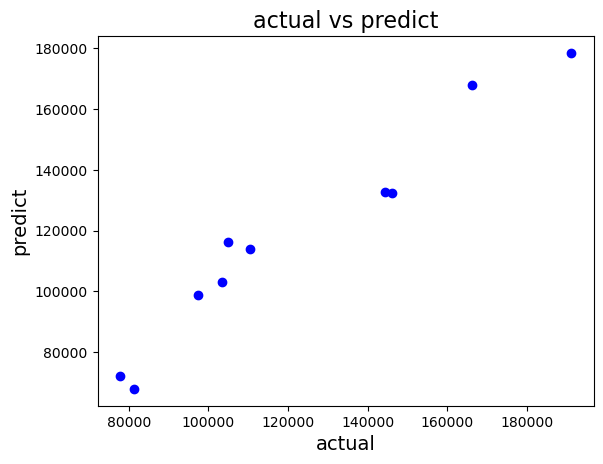

In [23]:
# dataset plot 
import matplotlib.pyplot as plt 
plt.scatter(y_test, y_predicted, color="blue")
plt.xlabel('actual', fontsize=14)
plt.ylabel('predict', fontsize=14)
plt.title('actual vs predict', fontsize=16)
plt.show()